In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
df = pd.read_csv("D:/Credit_Decisioning/data/credit_data_10000.csv")

In [ ]:
# 1. Basic Info & Overview
# ------------------------------
print(" Dataset Shape:", df.shape)
print("\n Data Types:\n", df.dtypes)
print("\n Missing Values:\n", df.isnull().sum())
print("\n Descriptive Statistics:\n", df.describe())

🔹 Dataset Shape: (10000, 8)

🔹 Data Types:
 id                 int64
age                int64
income             int64
loan_amount        int64
term               int64
gender            object
credit_history     int64
default            int64
dtype: object

🔹 Missing Values:
 id                0
age               0
income            0
loan_amount       0
term              0
gender            0
credit_history    0
default           0
dtype: int64

🔹 Descriptive Statistics:
                 id           age         income   loan_amount          term  \
count  10000.00000  10000.000000   10000.000000  10000.000000  10000.000000   
mean    5000.50000     42.490300   49922.820400  10119.609300     19.130400   
std     2886.89568     12.578375   14958.973547   4820.710083     10.292055   
min        1.00000     21.000000   -5449.000000   1000.000000      6.000000   
25%     2500.75000     32.000000   39776.750000   6659.500000     12.000000   
50%     5000.50000     42.500000   49965.000000


🔹 Default Distribution:
default
0    0.8519
1    0.1481
Name: proportion, dtype: float64


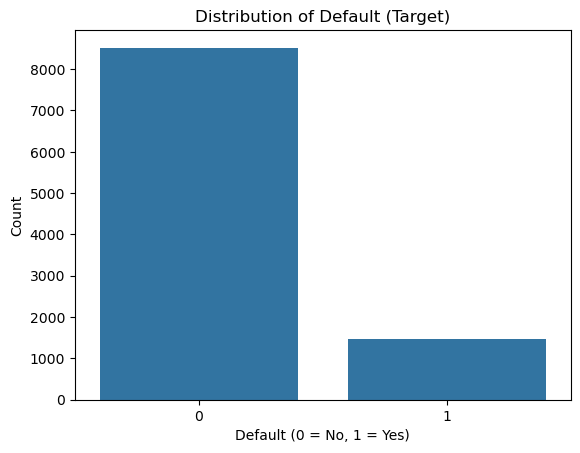

In [ ]:
# ------------------------------
# 2. Target Variable Distribution
# ------------------------------
print("\n Default Distribution:")
print(df['default'].value_counts(normalize=True))

sns.countplot(data=df, x='default')
plt.title('Distribution of Default (Target)')
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


🔹 Distribution of gender:
gender
M    5014
F    4986
Name: count, dtype: int64


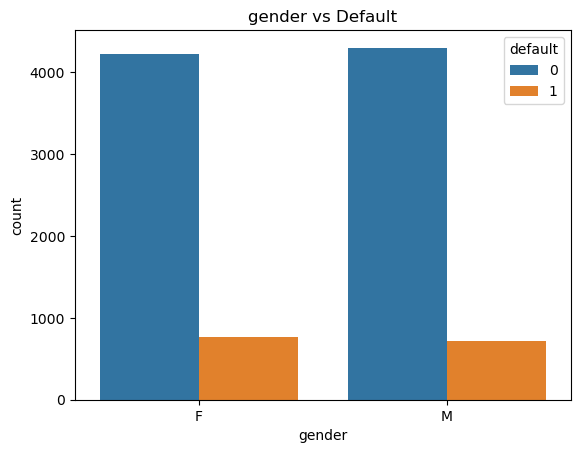


🔹 Distribution of credit_history:
credit_history
1    6991
0    3009
Name: count, dtype: int64


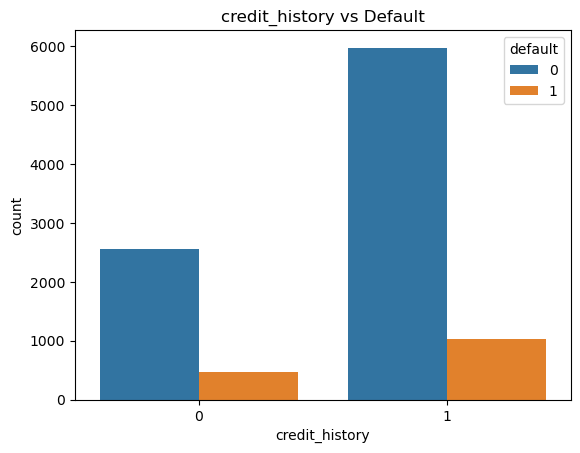


🔹 Distribution of term:
term
12    2069
24    1996
6     1984
18    1976
36    1975
Name: count, dtype: int64


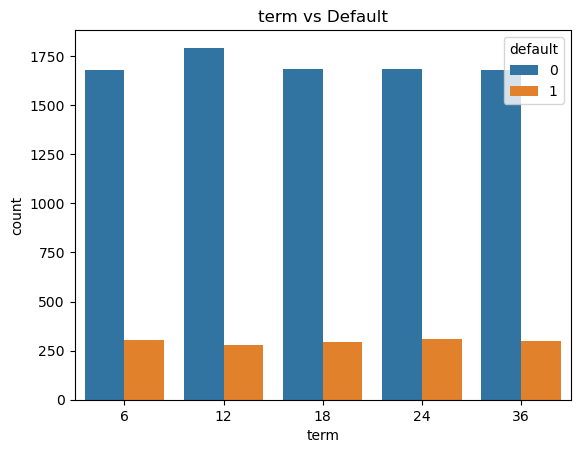

In [ ]:
# ------------------------------
# 3. Categorical Variables
# ------------------------------
cat_features = ['gender', 'credit_history', 'term']

for col in cat_features:
    print(f"\n Distribution of {col}:")
    print(df[col].value_counts())
    
    sns.countplot(data=df, x=col, hue='default')
    plt.title(f'{col} vs Default')
    plt.show()

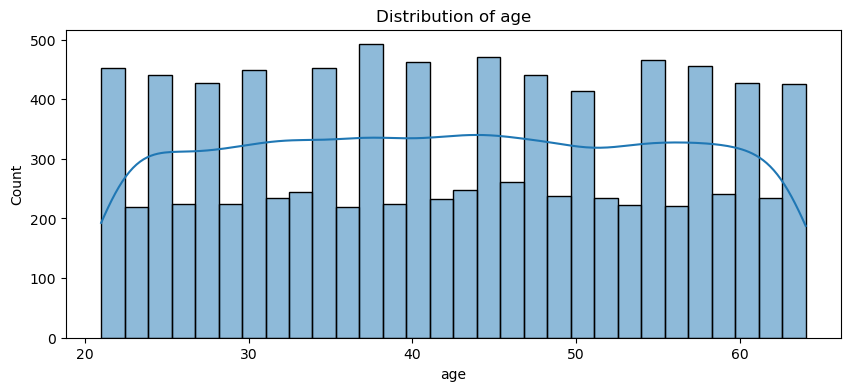

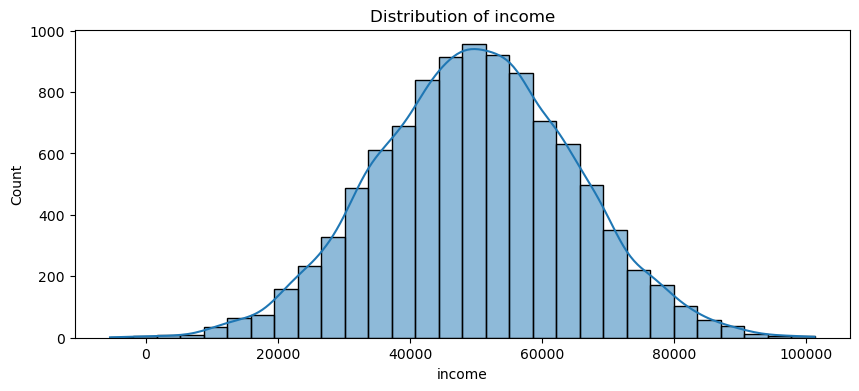

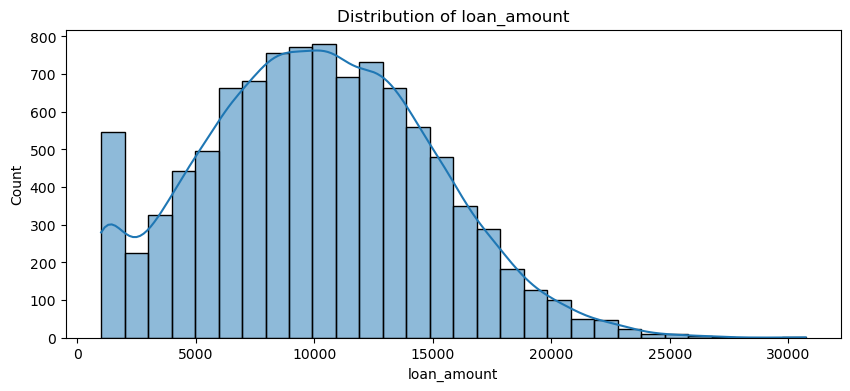

In [8]:
# ------------------------------
# 4. Numerical Features
# ------------------------------
num_features = ['age', 'income', 'loan_amount']

for col in num_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

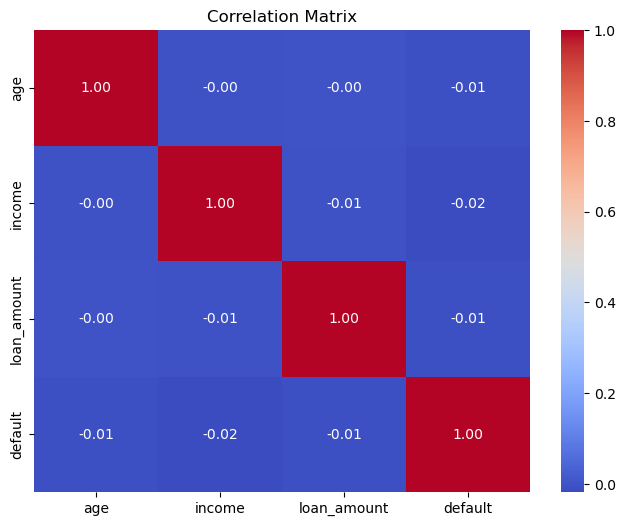

In [9]:
# Correlation Matrix
plt.figure(figsize=(8, 6))
corr = df[num_features + ['default']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

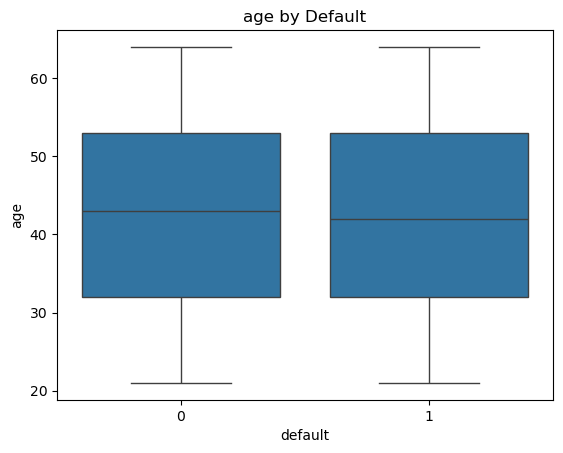

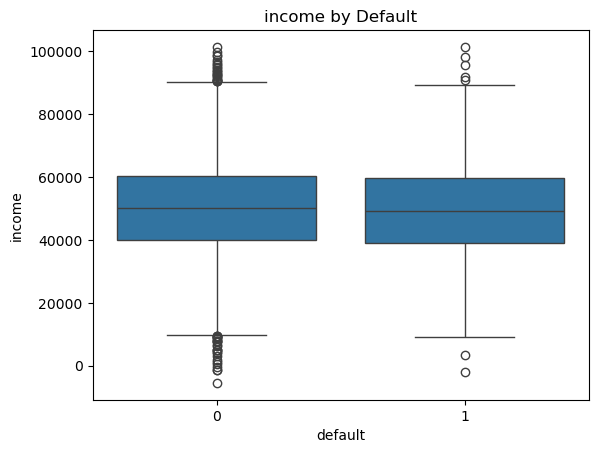

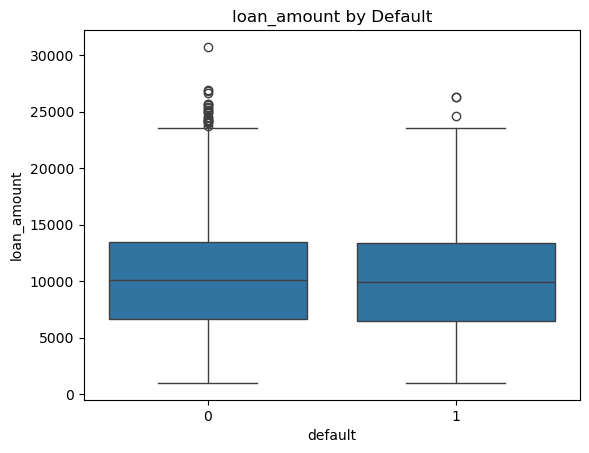

In [10]:
# Boxplots
for col in num_features:
    sns.boxplot(data=df, x='default', y=col)
    plt.title(f'{col} by Default')
    plt.show()

In [ ]:
# ------------------------------
# 5. Cross-tabulation
# ------------------------------
print("\n Cross Tab: Gender vs Default")
print(pd.crosstab(df['gender'], df['default'], normalize='index'))

print("\n Cross Tab: Credit History vs Default")
print(pd.crosstab(df['credit_history'], df['default'], normalize='index'))


🔹 Cross Tab: Gender vs Default
default        0        1
gender                   
F        0.84657  0.15343
M        0.85720  0.14280

🔹 Cross Tab: Credit History vs Default
default                0         1
credit_history                    
0               0.846793  0.153207
1               0.854098  0.145902


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_26224\1982661152.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_trend = df.groupby('income_bin')['default'].mean()


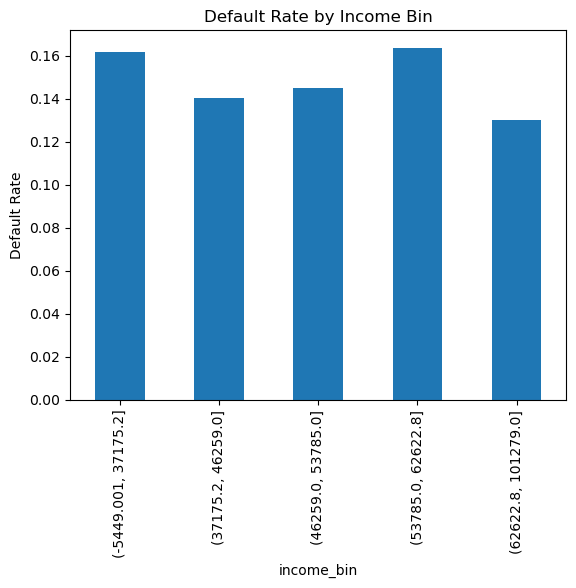

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_26224\1982661152.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_trend = df.groupby('age_bin')['default'].mean()


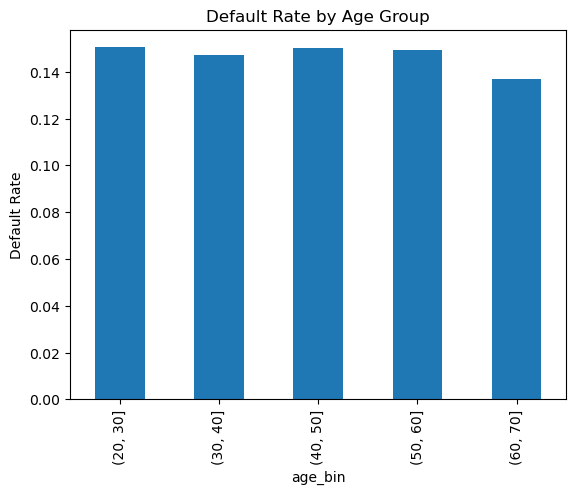

In [12]:
# ------------------------------
# 6. Feature Binning & Trends
# ------------------------------
df['income_bin'] = pd.qcut(df['income'], 5)
income_trend = df.groupby('income_bin')['default'].mean()

income_trend.plot(kind='bar', title='Default Rate by Income Bin')
plt.ylabel('Default Rate')
plt.show()

df['age_bin'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70])
age_trend = df.groupby('age_bin')['default'].mean()

age_trend.plot(kind='bar', title='Default Rate by Age Group')
plt.ylabel('Default Rate')
plt.show()

In [15]:
# ------------------------------
# 7. Outliers Detection (IQR)
# ------------------------------
def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]
    return outliers.shape[0]

print("\n Outliers Count:")
for col in num_features:
    print(f"{col}: {detect_outliers(col)} outliers")


 Outliers Count:
age: 0 outliers
income: 56 outliers
loan_amount: 25 outliers


In [14]:
# ------------------------------
# 8. Save Cleaned/Analyzed Data (Optional)
# ------------------------------
df.drop(['income_bin', 'age_bin'], axis=1, inplace=True)  # clean temp bins
df.to_csv("credit_data_cleaned.csv", index=False)
print("\n✅ Cleaned dataset saved as 'credit_data_cleaned.csv'")


✅ Cleaned dataset saved as 'credit_data_cleaned.csv'
